# Oracle Stock Prediction - LSTM



In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler

In [2]:
dataset=pd.read_csv("Oracle.csv")
display(dataset)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-12,0.063272,0.064043,0.063272,0.063272,0.053148,393012000
1,1986-03-13,0.064815,0.065586,0.064815,0.064815,0.054444,125290800
2,1986-03-14,0.067130,0.067901,0.067130,0.067130,0.056389,57866400
3,1986-03-17,0.066358,0.066358,0.065586,0.065586,0.055092,28285200
4,1986-03-18,0.064815,0.064815,0.064043,0.064043,0.053796,32335200
...,...,...,...,...,...,...,...
9119,2022-05-16,70.690002,70.910004,69.389999,69.709999,69.709999,6942100
9120,2022-05-17,71.050003,71.900002,70.699997,71.879997,71.879997,5952500
9121,2022-05-18,70.800003,70.940002,67.809998,68.300003,68.300003,7977300
9122,2022-05-19,67.480003,67.900002,66.720001,67.040001,67.040001,9451600


In [3]:
dataset['Date']=pd.to_datetime(dataset['Date'])
dataset=dataset.sort_values('Date',ascending=True).reset_index(drop=True)
#dataset['Date']=dataset['Date'].astype(str)
display(dataset)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-12,0.063272,0.064043,0.063272,0.063272,0.053148,393012000
1,1986-03-13,0.064815,0.065586,0.064815,0.064815,0.054444,125290800
2,1986-03-14,0.067130,0.067901,0.067130,0.067130,0.056389,57866400
3,1986-03-17,0.066358,0.066358,0.065586,0.065586,0.055092,28285200
4,1986-03-18,0.064815,0.064815,0.064043,0.064043,0.053796,32335200
...,...,...,...,...,...,...,...
9119,2022-05-16,70.690002,70.910004,69.389999,69.709999,69.709999,6942100
9120,2022-05-17,71.050003,71.900002,70.699997,71.879997,71.879997,5952500
9121,2022-05-18,70.800003,70.940002,67.809998,68.300003,68.300003,7977300
9122,2022-05-19,67.480003,67.900002,66.720001,67.040001,67.040001,9451600


In [4]:
trainset=dataset.iloc[-1000:-100,1:2].values #Open
testset=dataset.iloc[-100:,1:2].values #Open 
real_stock_price = testset.copy()

In [5]:
sc = MinMaxScaler(feature_range = (0,1))
training_scaled = sc.fit_transform(trainset)
print(training_scaled[0:5])
print(len(training_scaled))

[[0.10068072]
 [0.0983062 ]
 [0.09973087]
 [0.10780435]
 [0.09957259]]
900


In [6]:
x_train = []
y_train = []

In [7]:
for i in range(60,len(training_scaled)):
    x_train.append(training_scaled[i-60:i, 0])
    y_train.append(training_scaled[i,0])
x_train,y_train = np.array(x_train),np.array(y_train)
print(x_train.shape,y_train.shape)

(840, 60) (840,)


In [8]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
print('(samples, time steps, features) =',x_train.shape)

(samples, time steps, features) = (840, 60, 1)


In [9]:
regressor = Sequential()
regressor.add(LSTM(units = 50,return_sequences = True,input_shape = (x_train.shape[1],1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))

In [10]:
regressor.compile(optimizer = 'adam',loss = 'mean_squared_error')
regressor.fit(x_train,y_train,epochs =10, batch_size = 32)

Epoch 1/10
27/27 [==============================] - 3s 33ms/step - loss: 0.0337
Epoch 2/10
27/27 [==============================] - 1s 32ms/step - loss: 0.0049
Epoch 3/10
27/27 [==============================] - 1s 30ms/step - loss: 0.0041
Epoch 4/10
27/27 [==============================] - 1s 31ms/step - loss: 0.0041
Epoch 5/10
27/27 [==============================] - 1s 31ms/step - loss: 0.0040
Epoch 6/10
27/27 [==============================] - 1s 32ms/step - loss: 0.0039
Epoch 7/10
27/27 [==============================] - 1s 31ms/step - loss: 0.0037
Epoch 8/10
27/27 [==============================] - 1s 32ms/step - loss: 0.0036
Epoch 9/10
27/27 [==============================] - 1s 32ms/step - loss: 0.0033
Epoch 10/10
27/27 [==============================] - 1s 32ms/step - loss: 0.0032


In [11]:
inputs = dataset.iloc[len(trainset)-len(testset)-60:,1].values
print(inputs.shape)
print(inputs[0:10])

(8384,)
[0.282407 0.283951 0.280864 0.290123 0.296296 0.290123 0.285494 0.277778
 0.287037 0.280864]


In the context of a LSTM model, this reshaping may be necessary if the input data has only one feature (i.e., one time series) and the LSTM model expects a 3D input shape of (n_samples, n_time_steps, n_features). In this case, since there is only one feature, the shape does not change.

In [12]:
inputs = inputs.reshape(-1,1)
print(inputs.shape)

#sc = MinMaxScaler(feature_range = (0,1))
inputs = sc.transform(inputs)
print(inputs.shape)

(8384, 1)
(8384, 1)


In [13]:
x_test = []
for i in range(60,len(inputs)):
    x_test.append(inputs[i-60:i,0])
x_test = np.array(x_test)
print(x_test.shape)

x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
print(x_test.shape)

(8324, 60)
(8324, 60, 1)


In [14]:
predicted_price = regressor.predict(x_test)

261/261 [==============================] - 3s 8ms/step


In [15]:
predicted_price = sc.inverse_transform(predicted_price)
print(predicted_price.shape)

(8324, 1)


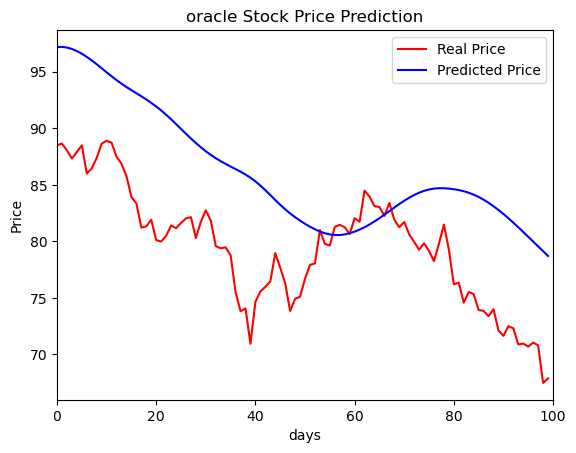

In [25]:
plt.plot(real_stock_price[-100:],color = 'red', label = 'Real Price')
plt.plot(predicted_price[-100:], color = 'blue', label = 'Predicted Price')
plt.title('oracle Stock Price Prediction')
plt.xlabel('days')
plt.ylabel('Price')
plt.xlim(0,100)  
plt.legend()
plt.show()

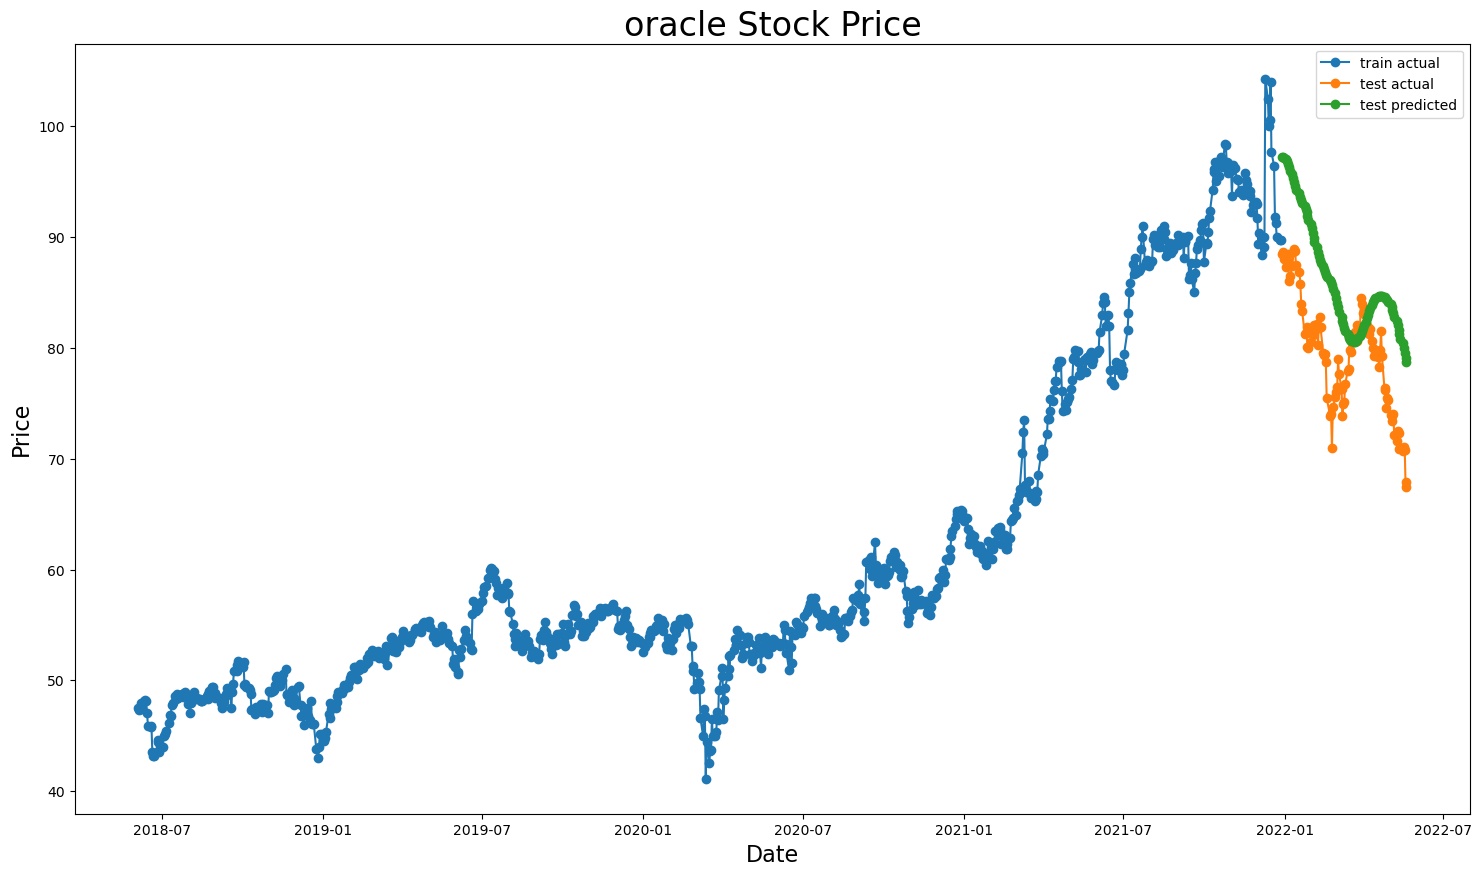

In [24]:
plt.figure(figsize=(18,10))
plt.plot(dataset.iloc[-1000:-100,0],trainset,'-o',label='train actual')
#plt.plot(dataset.iloc[-1000:-100,0],train_pred,'--',label='Prophet')
plt.plot(dataset.iloc[-100:,0],real_stock_price[-100:],'-o',label='test actual')
plt.plot(dataset.iloc[-100:,0],predicted_price[-100:],'-o',label='test predicted')
plt.title('oracle Stock Price',size=24)
plt.xlabel('Date',size=16)
plt.ylabel('Price',size=16)
plt.legend()
plt.show()

In [18]:
inputs = np.array(trainset[-60:])
new_predicted_price=[]
for i in range(100):
    x = np.reshape(inputs, (1,60,1))
    pred = regressor.predict(x)
    inputs = np.append(inputs, pred)
    inputs = inputs[1:]
    new_predicted_price+=[pred.reshape(-1)]

1/1 [==============================] - 0s 8ms/step


In [19]:
new_predicted_price = sc.inverse_transform(np.array(new_predicted_price))
print(new_predicted_price.shape)

(100, 1)


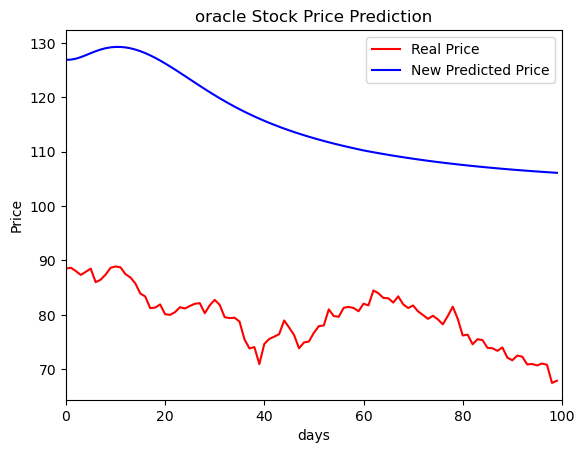

In [23]:
plt.plot(real_stock_price,color = 'red', label = 'Real Price')
plt.plot(new_predicted_price, color = 'blue', label = 'New Predicted Price')
plt.title('oracle Stock Price Prediction')
plt.xlabel('days')
plt.ylabel('Price')
plt.xlim(0,100)  
plt.legend()
plt.show()

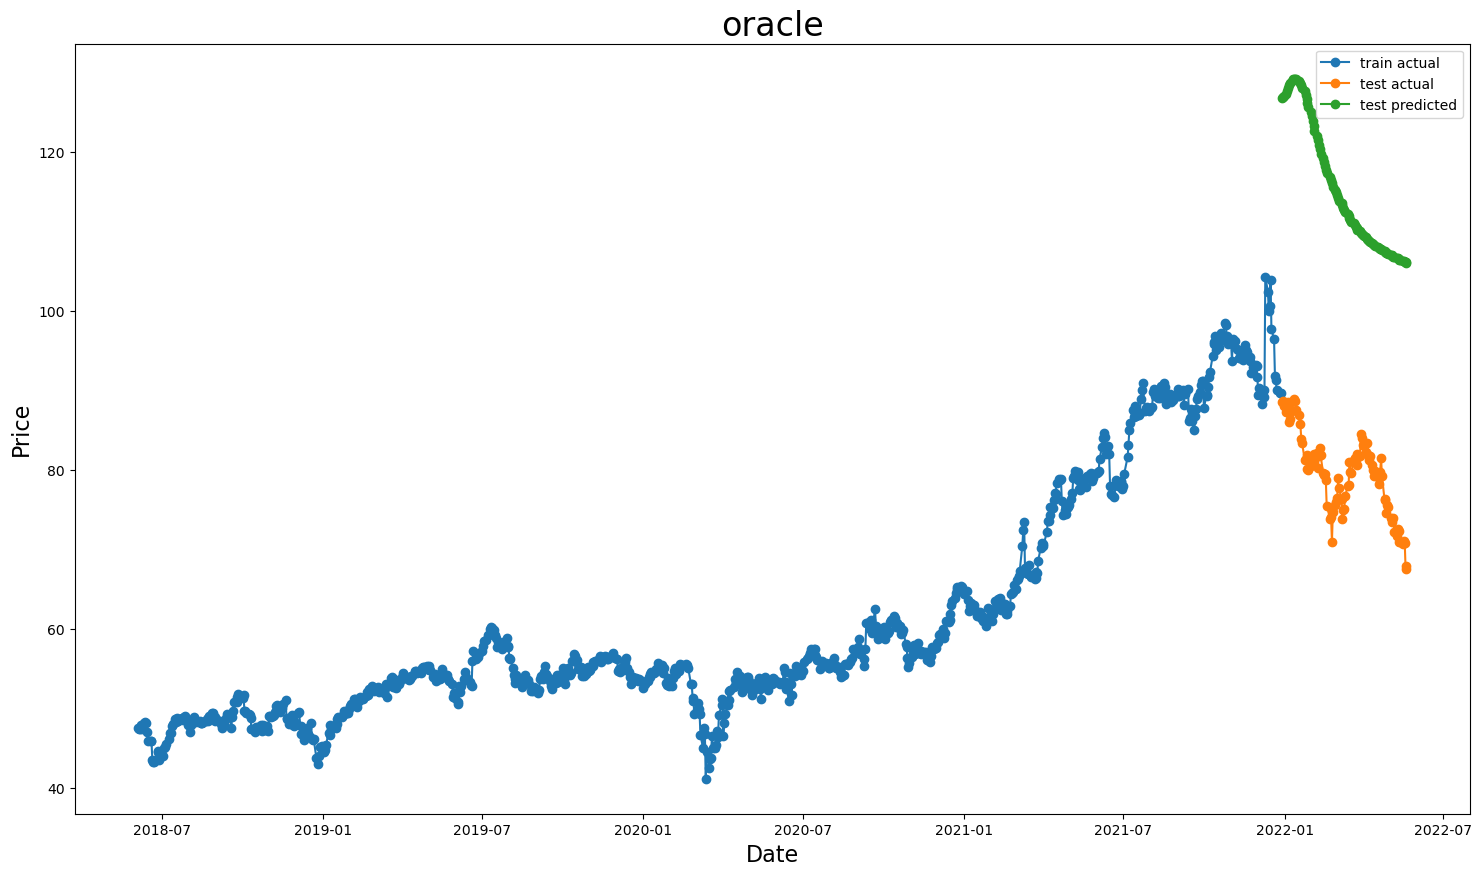

In [22]:
plt.figure(figsize=(18,10))
plt.plot(dataset.iloc[-1000:-100,0],trainset,'-o',label='train actual')
#plt.plot(dataset.iloc[-1000:-100,0],train_pred,'--',label='Prophet')
plt.plot(dataset.iloc[-100:,0],real_stock_price[-100:],'-o',label='test actual')
plt.plot(dataset.iloc[-100:,0],new_predicted_price[-100:],'-o',label='test predicted')
plt.title('oracle',size=24)
plt.xlabel('Date',size=16)
plt.ylabel('Price',size=16)
plt.legend()
plt.show()